# ml zoomcamp
## session 1 homework
### name: Isaac Muturi
### email: ndirangumuturi749@gmail.com

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [2]:
import wget

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = 'housing.csv'

wget.download(url, filename)


100% [..........................................................................] 1423529 / 1423529

'housing (4).csv'

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [3]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('housing.csv')
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


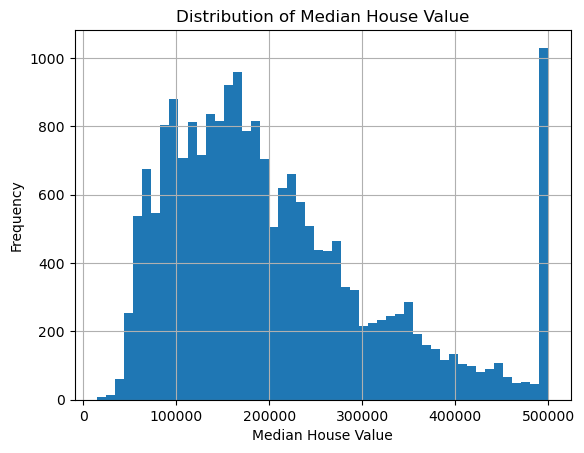

In [4]:
# Check the 'median_house_value' variable for a long tail ( using a histogram)
import matplotlib.pyplot as plt
data['median_house_value'].hist(bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

yes, it has a long tail

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [5]:
# Filter the data based on 'ocean_proximity' and select specific columns
filtered_data = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
selected_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
filtered_data = filtered_data[selected_columns]
filtered_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`




In [6]:
# Check for missing values
filtered_data.isnull().any()



latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

total_bedrooms 

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [7]:
median_population = filtered_data['population'].median()
print(median_population)


1195.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [8]:
# Shuffle the data with seed 42
np.random.seed(42)
shuffled_indices = np.random.permutation(len(filtered_data))
shuffled_data = filtered_data.iloc[shuffled_indices]

# Calculate the split indices
train_size = int(0.6 * len(shuffled_data))
val_size = int(0.2 * len(shuffled_data))
train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:(train_size + val_size)]
test_indices = shuffled_indices[(train_size + val_size):]

# Split data into train/val/test
train = shuffled_data.iloc[train_indices].copy()
val = shuffled_data.iloc[val_indices].copy()
test = shuffled_data.iloc[test_indices].copy()

# Apply log transformation to 'median_house_value' using .loc
train['median_house_value'] = np.log1p(train['median_house_value'])
val['median_house_value'] = np.log1p(val['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good




In [9]:
# Option 1: Fill missing values with 0
train_option1 = train.fillna(0)
val_option1 = val.fillna(0)

# Define a function for linear regression without regularization
def linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Train a linear regression model for Option 1
X_train_option1 = train_option1.drop(columns='median_house_value').values
y_train_option1 = train_option1['median_house_value'].values
beta_option1 = linear_regression(X_train_option1, y_train_option1)

# Make predictions on the validation dataset for Option 1
X_val_option1 = val_option1.drop(columns='median_house_value').values
y_val_option1 = val_option1['median_house_value'].values
y_pred_option1 = X_val_option1 @ beta_option1[1:] + beta_option1[0]

# Calculate RMSE for Option 1
rmse_option1 = np.sqrt(np.mean((y_val_option1 - y_pred_option1) ** 2))

# Option 2: Fill missing values with the mean of the training data
mean_total_bedrooms = train['total_bedrooms'].mean()
train_option2 = train.fillna({'total_bedrooms': mean_total_bedrooms})
val_option2 = val.fillna({'total_bedrooms': mean_total_bedrooms})

# Train a linear regression model for Option 2
X_train_option2 = train_option2.drop(columns='median_house_value').values
y_train_option2 = train_option2['median_house_value'].values
beta_option2 = linear_regression(X_train_option2, y_train_option2)

# Make predictions on the validation dataset for Option 2
X_val_option2 = val_option2.drop(columns='median_house_value').values
y_val_option2 = val_option2['median_house_value'].values
y_pred_option2 = X_val_option2 @ beta_option2[1:] + beta_option2[0]

# Calculate RMSE for Option 2
rmse_option2 = np.sqrt(np.mean((y_val_option2 - y_pred_option2) ** 2))

# Compare RMSE for both options
if rmse_option1 < rmse_option2:
    print("Option 1 (Fill with 0) gives better RMSE:", round(rmse_option1, 2))
elif rmse_option2 < rmse_option1:
    print("Option 2 (Fill with mean) gives better RMSE:", round(rmse_option2, 2))
else:
    print("Both options are equally good with RMSE:", round(rmse_option1, 2))


Option 2 (Fill with mean) gives better RMSE: 0.34


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [10]:
import numpy as np

def ridge_regression(X, y, alpha):
    n = X.shape[1]
    I = np.identity(n)
    beta = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    return beta

# Fill missing values with 0 for regularization
train_reg = train.fillna(0)
val_reg = val.fillna(0)

# Define a list of regularization parameters (alpha values)
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Initialize variables to keep track of the best RMSE and corresponding alpha
best_rmse = float('inf')
best_alpha = None

# Extract the feature matrix and target variable for regularization
X_train_reg = train_reg.drop(columns='median_house_value').values
y_train_reg = train_reg['median_house_value'].values

# Add a column of ones for the bias term to X_train_reg
X_train_reg_with_bias = np.column_stack([np.ones(X_train_reg.shape[0]), X_train_reg])

# Iterate through different alpha values and compute RMSE for each
for alpha in r_values:
    # Extract the feature matrix and target variable for validation
    X_val_reg = val_reg.drop(columns='median_house_value').values
    y_val_reg = val_reg['median_house_value'].values
    
    # Add a column of ones for the bias term to X_val_reg
    X_val_reg_with_bias = np.column_stack([np.ones(X_val_reg.shape[0]), X_val_reg])
    
    # Train a regularized linear regression model
    beta_reg = ridge_regression(X_train_reg_with_bias, y_train_reg, alpha)
    
    # Make predictions on the validation dataset
    y_pred_reg = X_val_reg_with_bias @ beta_reg
    
    # Calculate RMSE
    rmse_reg = np.sqrt(np.mean((y_val_reg - y_pred_reg) ** 2))
    
    # Check if this alpha gives a better RMSE
    if rmse_reg < best_rmse:
        best_rmse = rmse_reg
        best_alpha = alpha

print("Best alpha (r):", best_alpha)


Best alpha (r): 0.01


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np

X_train = train_option1.drop(columns='median_house_value').values
y_train = train_option1['median_house_value'].values

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:

    # Fill the missing values with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    X_test = X_test.fillna(0)

    # Train a model without regularization
    model = train_model(X_train, y_train)

    # Evaluate the model on the validation dataset
    rmse_score = evaluate_model(model, X_val, y_val)

    # Append the RMSE score to the list
    rmse_scores.append(rmse_score)

# Compute the standard deviation of all the RMSE scores
std = np.std(rmse_scores)

# Round the result to 3 decimal digits
std = round(std, 3)

# Print the standard deviation
print(std)


AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [ ]:
# Split the dataset using seed 9
shuffled_data = filtered_data.sample(frac=1, random_state=9)
train, val, test = np.split(shuffled_data, [int(0.6 * len(shuffled_data)), int(0.8 * len(shuffled_data))])

# Combine train and validation datasets
combined_train = pd.concat([train, val])

# Fill missing values with 0 for combined train and test
combined_train = combined_train.fillna(0)
test = test.fillna(0)

# Extract feature matrices and target variables
X_combined_train = combined_train.drop(columns='median_house_value').values
y_combined_train = combined_train['median_house_value'].values
X_test = test.drop(columns='median_house_value').values
y_test = test['median_house_value'].values

# Train a regularized linear regression model with r=0.001
beta_combined = ridge_regression(X_combined_train, y_combined_train, 0.001)

# Make predictions on the test dataset
y_pred_combined = X_test @ beta_combined[1:] + beta_combined[0]

# Calculate RMSE on the test dataset
rmse_combined = np.sqrt(np.mean((y_test - y_pred_combined) ** 2))

print("RMSE on Test Dataset:", round(rmse_combined, 2))
